In [1]:
# 한글 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from dotenv import load_dotenv

print(load_dotenv())

False


In [4]:
!kaggle datasets download prachi13/customer-analytics

Dataset URL: https://www.kaggle.com/datasets/prachi13/customer-analytics
License(s): other
customer-analytics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile

HOME = os.getcwd()

zip_file_path = os.path.join(HOME,'customer-analytics.zip')
extract_to_path = os.path.join(HOME,'data')

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
    print(f"압축 해제 완료: {extract_to_path}")
# 해제된 파일 목록 확인
print("현재 폴더 파일 목록:", os.listdir(extract_to_path))

압축 해제 완료: c:\Users\User\github\DataScience\Ecom_Shipping\data
현재 폴더 파일 목록: ['Train.csv']


데이터셋 불러오기

In [6]:
HOME = os.getcwd()

df_csv= os.path.join(extract_to_path,'train.csv')

df = pd.read_csv(df_csv)

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**컬럼 소개 (California Housing Dataset)**

행의 수 : 10999 <br>
컬럼 수 : 12 

* **ID**: 고객 ID 번호
* **Warehouse block**: 창고 구역 (A, B, C, D, E 블록으로 구분)
* **Mode of shipment**: 배송 수단 (선박, 항공, 도로)
* **Customer care calls**: 배송 문의를 위해 고객 센터에 전화한 횟수
* **Customer rating**: 고객 평점 (1: 가장 낮음/최악, 5: 가장 높음/최고)
* **Cost of the product**: 제품 가격 (미국 달러 기준)
* **Prior purchases**: 이전 구매 횟수
* **Product importance**: 제품 중요도 (낮음, 중간, 높음으로 분류)
* **Gender**: 성별 (남성, 여성)
* **Discount offered**: 해당 제품에 제공된 할인액
* **Weight in gms**: 제품 무게 (그램 단위)
* **Reached on time**: 정시 도착 여부 (타겟 변수 - 1: 정시에 도착하지 않음, 0: 정시에 도착함)

In [8]:
# Reached on time을 target으로 변경
df['target'] = df['Reached.on.Time_Y.N']
df = df.drop(columns=['Reached.on.Time_Y.N'])
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,target
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [9]:
# 1. 특정 범위 설정
x_min, x_max = 1000, 2000
y_min, y_max = 0, 10
# 2. 조건에 맞는 데이터 필터링
subset = df[
    (df['Weight_in_gms'] >= x_min) & (df['Weight_in_gms'] <= x_max) & 
    (df['Discount_offered'] >= y_min) & (df['Discount_offered'] <= y_max)
]
# 3. 개수 출력
count = len(subset)
print(f"해당 영역({x_min}~{x_max}, {y_min}~{y_max}) 내의 점 개수: {count}개")
print(f"그 중 배송 지연(target=1)인 개수: {subset['target'].sum()}개")

해당 영역(1000~2000, 0~10) 내의 점 개수: 2123개
그 중 배송 지연(target=1)인 개수: 1077개


### 데이터 분석

#### **Reached on time**: 정시 도착 여부 (타겟 변수 - 1: 정시에 도착하지 않음, 0: 정시에 도착함)

In [10]:
df['target'].value_counts()

target
1    6563
0    4436
Name: count, dtype: int64

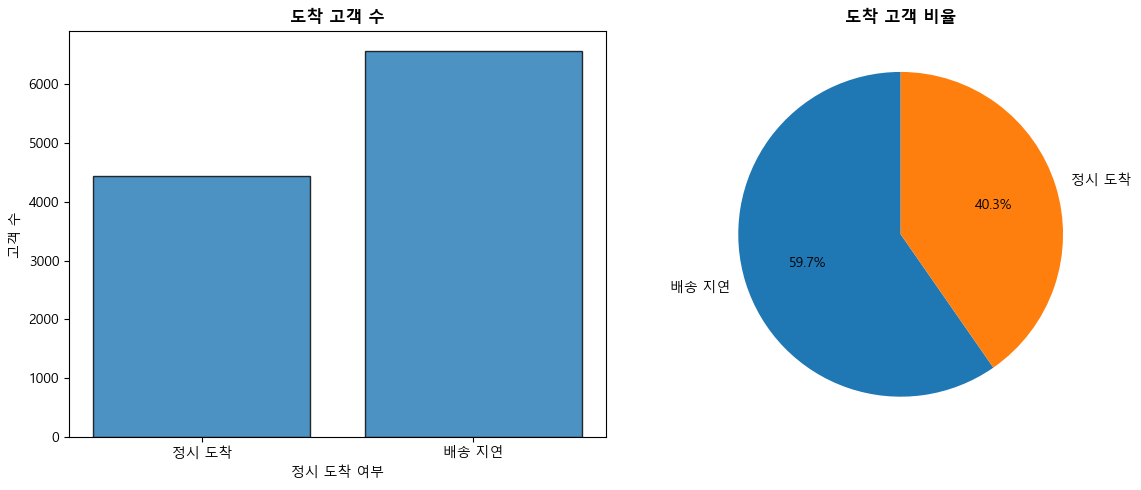

In [11]:
class_counts = df['target'].value_counts()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 막대 그래프
axes[0].bar(df['target'].unique(), class_counts.values, edgecolor='black', alpha=0.8)
axes[0].set_title('도착 고객 수', fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['정시 도착', '배송 지연'])
axes[0].set_xlabel('정시 도착 여부')
axes[0].set_ylabel('고객 수')

# 파이 차트
m_labels = ['배송 지연', '정시 도착'] 
axes[1].pie(class_counts.values, labels=m_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('도착 고객 비율', fontweight='bold')
plt.tight_layout()
plt.show()

#### **ID**: 고객 ID 번호

In [12]:
print(f"중복되지 않은 데이터 수: {df['ID'].nunique()}")
print("중복된 데이터 수:", df['ID'].duplicated().sum())
print("중복된 데이터가 많아서 ID 삭제")

중복되지 않은 데이터 수: 10999
중복된 데이터 수: 0
중복된 데이터가 많아서 ID 삭제


In [13]:
mean_val = df['target'].mean()

#### **Warehouse block**: 창고 구역 (A, B, C, D, E 블록으로 구분)

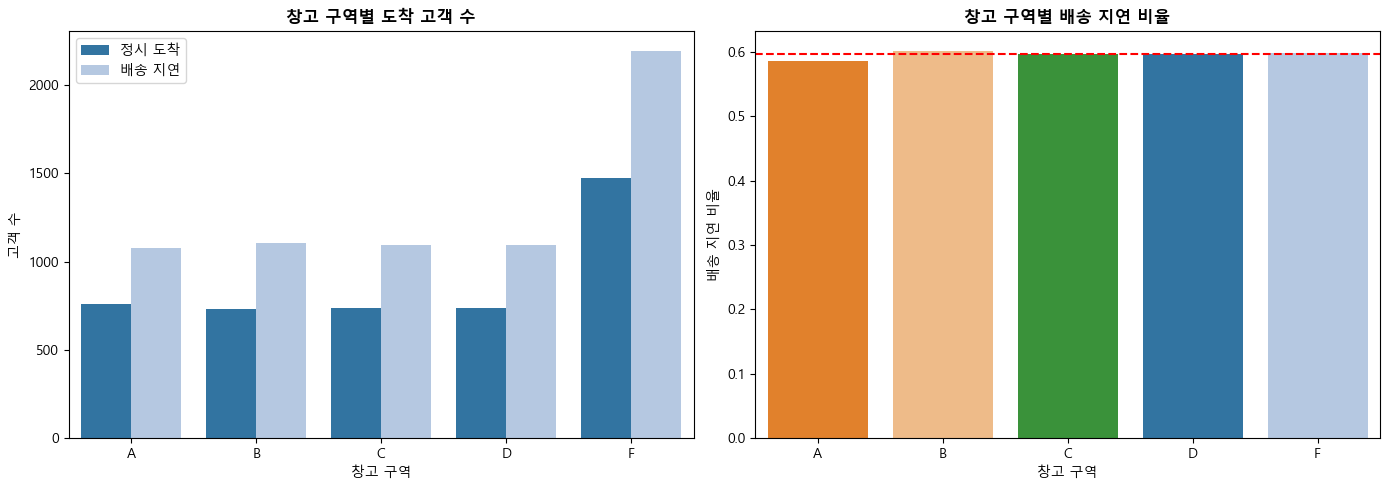

In [14]:
sorted_warehouse = sorted(df['Warehouse_block'].unique())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Warehouse_block', hue='target', data=df, order=sorted_warehouse, palette='tab20', ax=axes[0])
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_title('창고 구역별 도착 고객 수', fontweight='bold')
axes[0].set_xlabel('창고 구역')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Warehouse_block', y='target', data=df, order=sorted_warehouse, palette='tab20', hue='Warehouse_block', errorbar=None, ax=axes[1])
axes[1].set_title('창고 구역별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('창고 구역')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Mode of shipment**: 배송 수단 (선박, 항공, 도로)

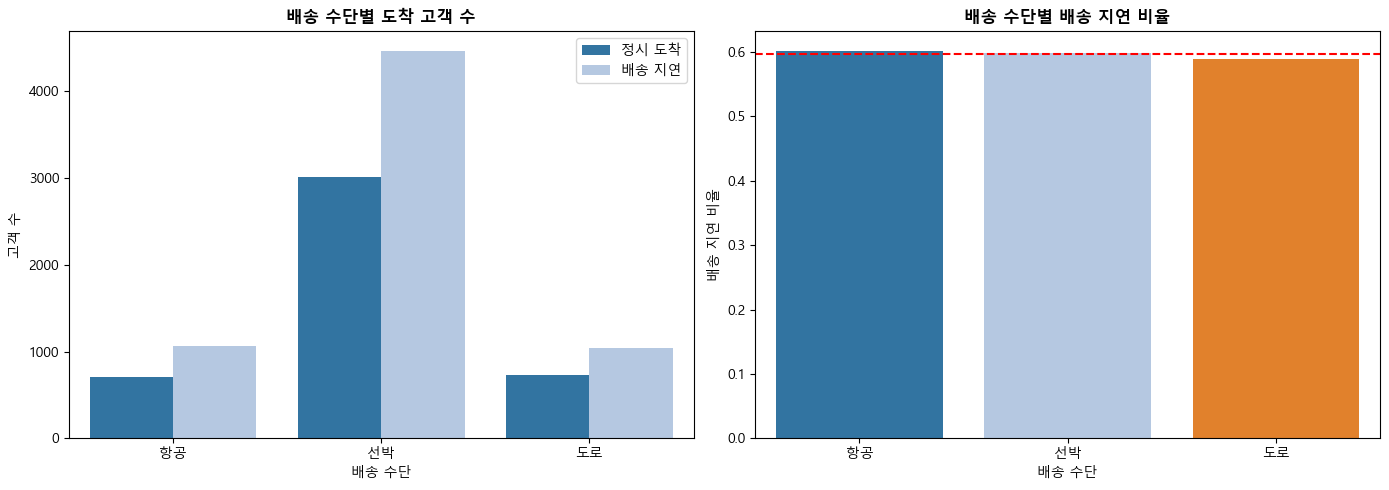

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Mode_of_Shipment', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('배송 수단별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['항공', '선박','도로'])
axes[0].set_xlabel('배송 수단')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Mode_of_Shipment', y='target', data=df, palette='tab20', hue='Mode_of_Shipment', errorbar=None, ax=axes[1])
axes[1].set_title('배송 수단별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['항공', '선박','도로'])
axes[1].set_xlabel('배송 수단')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Customer care calls**: 배송 문의를 위해 고객 센터에 전화한 횟수

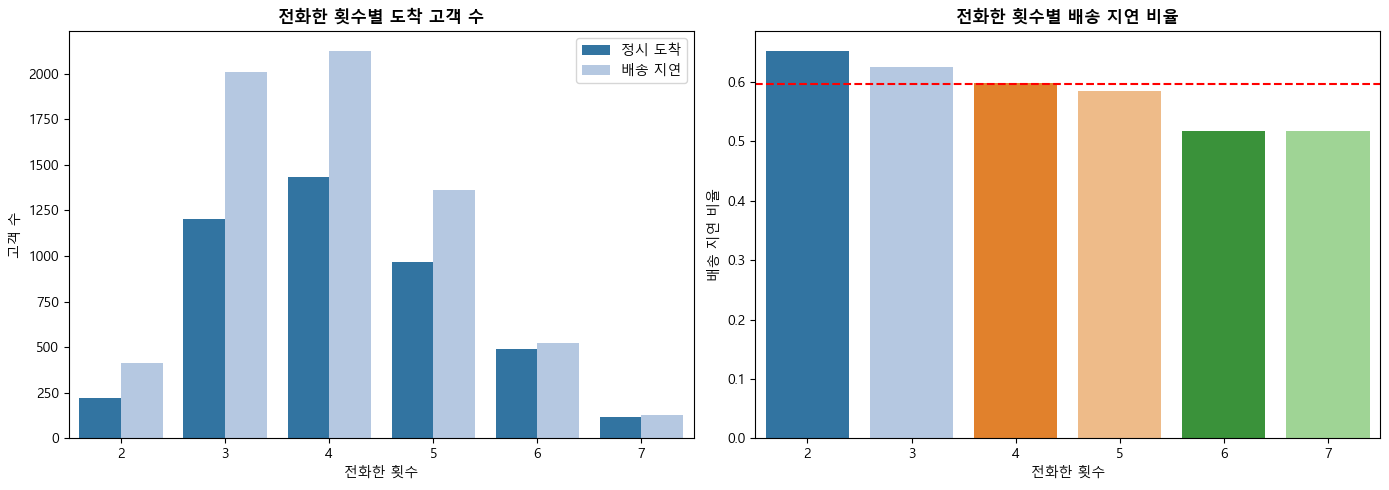

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Customer_care_calls', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('전화한 횟수별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('전화한 횟수')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Customer_care_calls', y='target', data=df, palette='tab20', hue='Customer_care_calls', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('전화한 횟수별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('전화한 횟수')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Customer rating**: 고객 평점 (1: 가장 낮음/최악, 5: 가장 높음/최고)

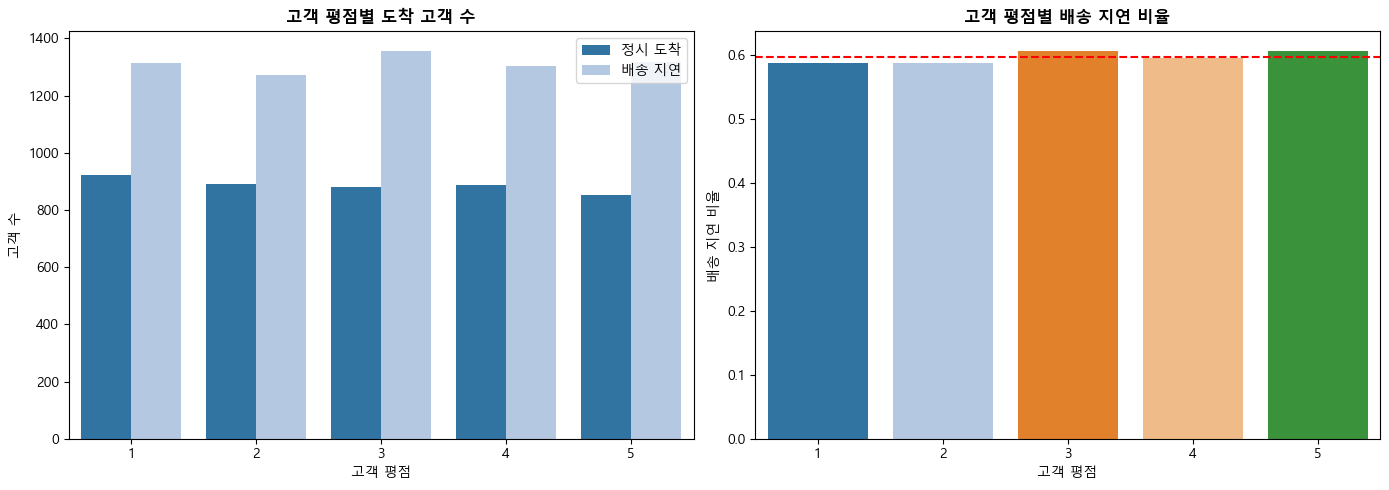

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Customer_rating', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('고객 평점별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('고객 평점')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Customer_rating', y='target', data=df, palette='tab20', hue='Customer_rating', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('고객 평점별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('고객 평점')
axes[1].set_ylabel('배송 지연 비율')
plt.tight_layout()
plt.show()

#### **Cost of the product**: 제품 가격 (미국 달러 기준)

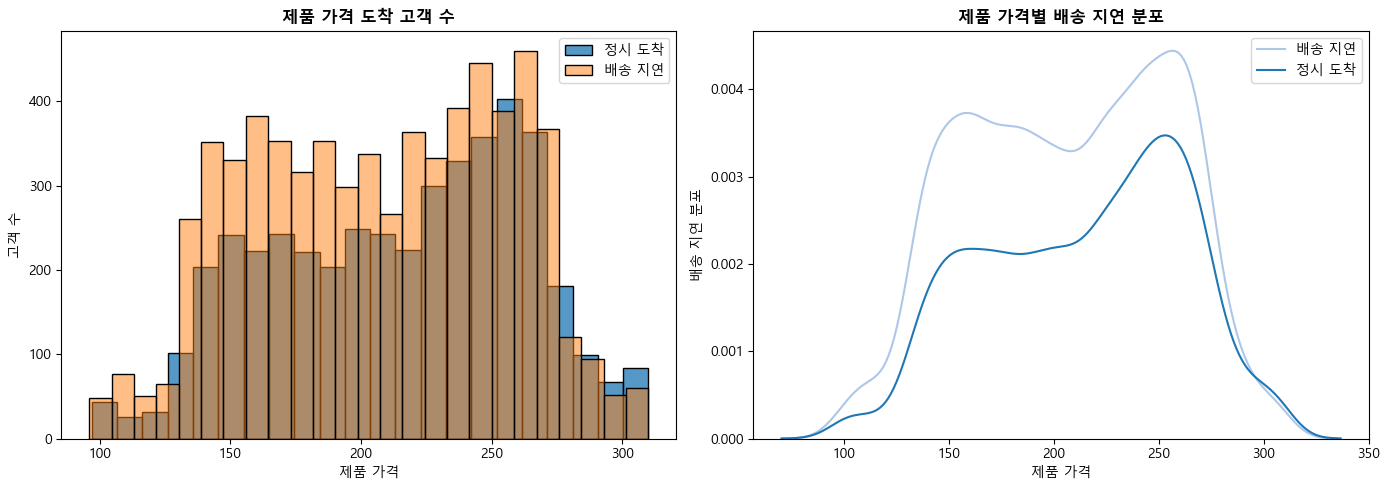

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Cost_of_the_Product'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Cost_of_the_Product'], ax=axes[0], alpha=0.5)
axes[0].set_title('제품 가격 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('제품 가격')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Cost_of_the_Product', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 가격별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('제품 가격')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

#### **Prior purchases**: 이전 구매 횟수

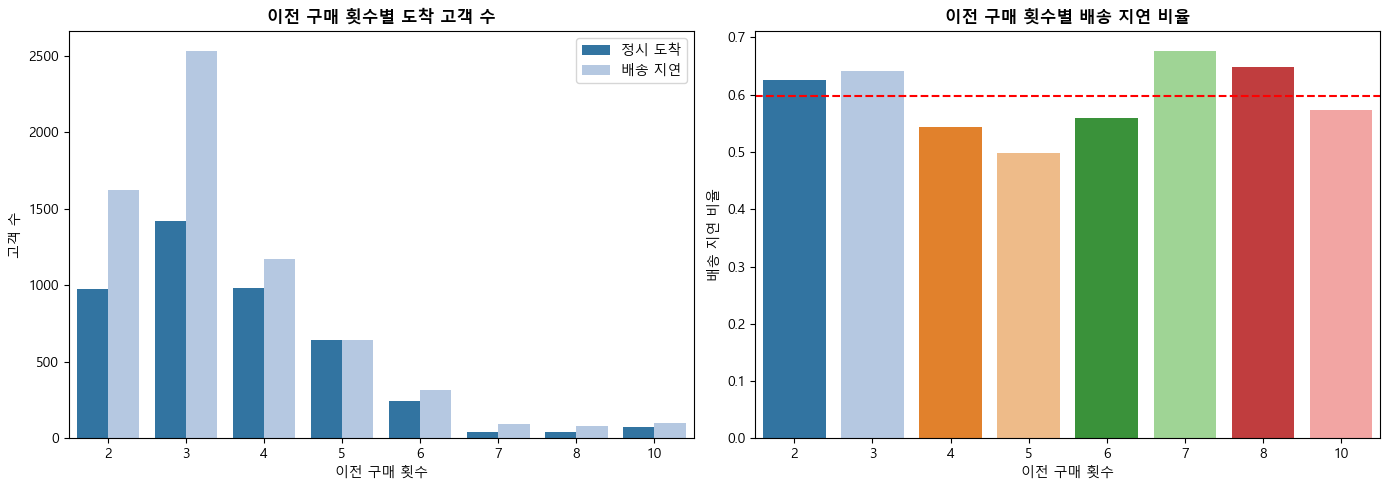

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Prior_purchases', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('이전 구매 횟수별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('이전 구매 횟수')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Prior_purchases', y='target', data=df, palette='tab20', hue='Prior_purchases', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('이전 구매 횟수별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xlabel('이전 구매 횟수')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Product importance**: 제품 중요도 (낮음, 중간, 높음으로 분류)

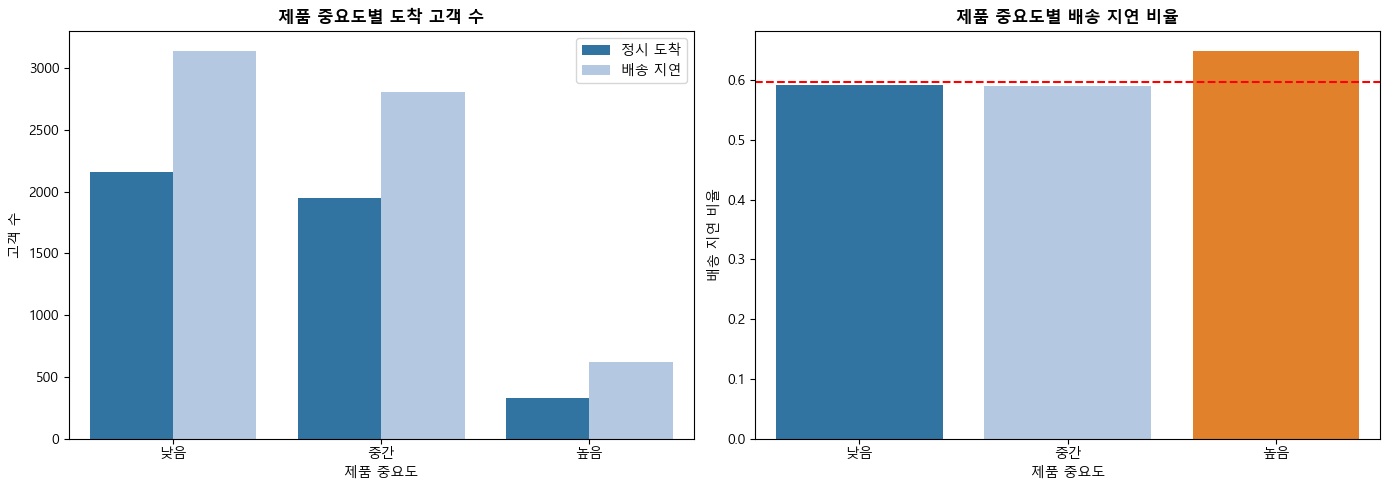

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Product_importance', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('제품 중요도별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['낮음', '중간', '높음'])
axes[0].set_xlabel('제품 중요도')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Product_importance', y='target', data=df, palette='tab20', hue='Product_importance', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('제품 중요도별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['낮음', '중간', '높음'])
axes[1].set_xlabel('제품 중요도')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

#### **Gender**: 성별 (남성, 여성)

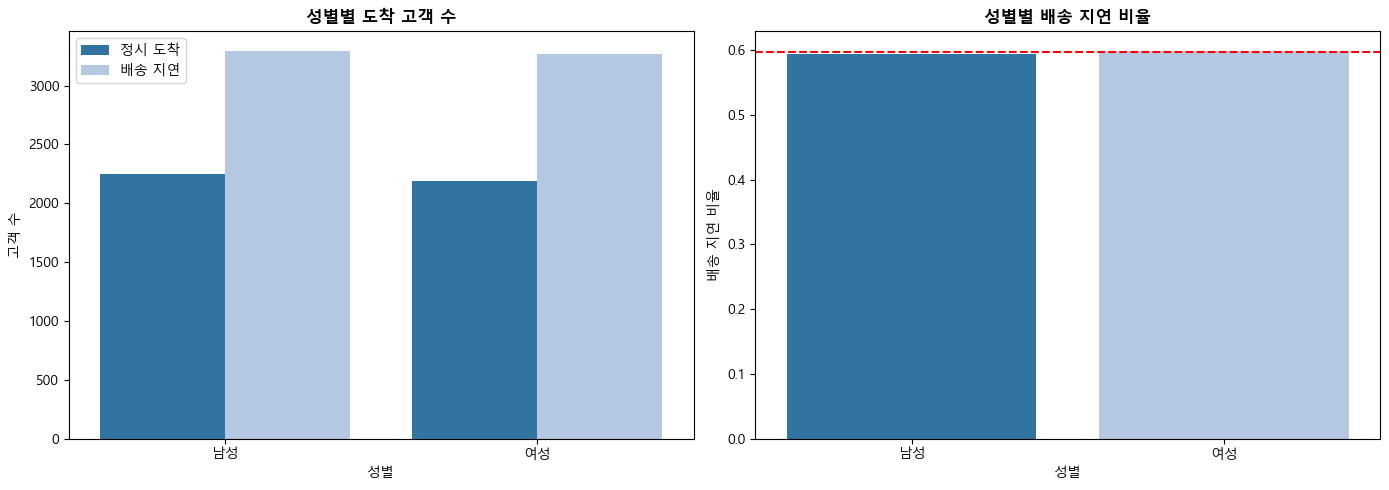

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Gender', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('성별별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['남성', '여성'])
axes[0].set_xlabel('성별')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Gender', y='target', data=df, palette='tab20', hue='Gender', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('성별별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['남성', '여성'])
axes[1].set_xlabel('성별')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

### **Discount offered**: 해당 제품에 제공된 할인액

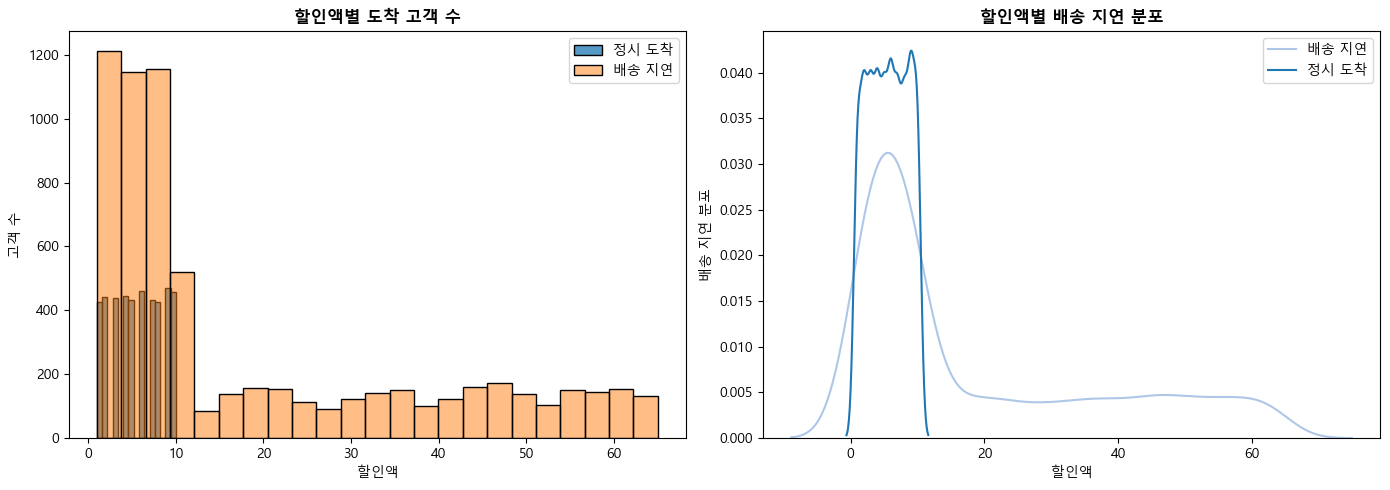

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Discount_offered'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Discount_offered'], ax=axes[0], alpha=0.5)
axes[0].set_title('할인액별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('할인액')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Discount_offered', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('할인액별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('할인액')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

### **Weight in gms**: 제품 무게 (그램 단위)

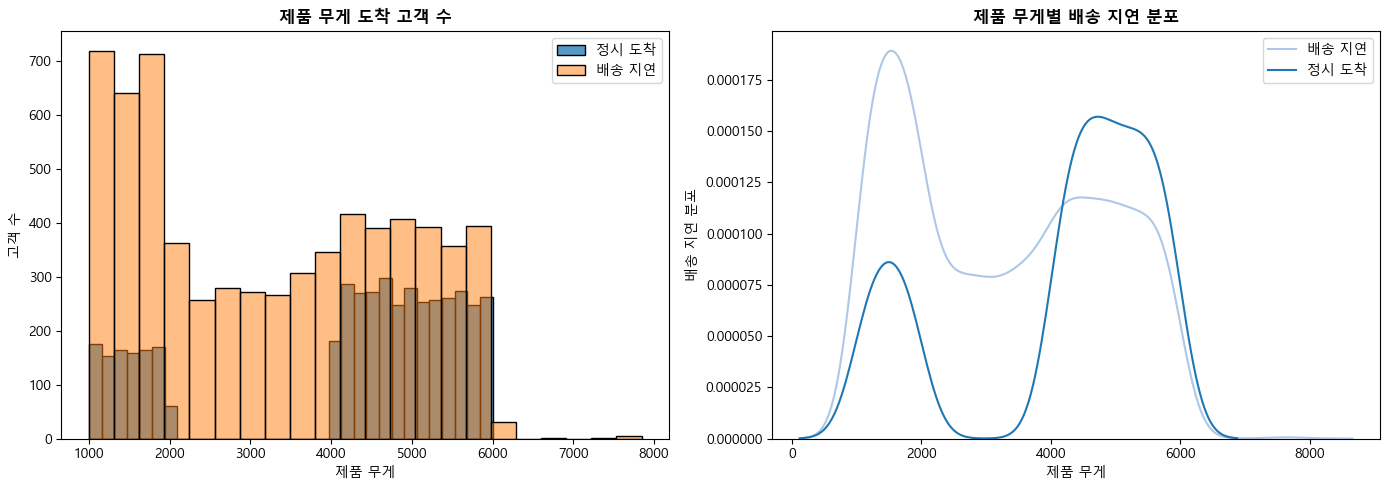

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df['target'] == 0]['Weight_in_gms'], ax=axes[0])
sns.histplot(df[df['target'] == 1]['Weight_in_gms'], ax=axes[0], alpha=0.5)
axes[0].set_title('제품 무게 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xlabel('제품 무게')
axes[0].set_ylabel('고객 수')

sns.kdeplot(x='Weight_in_gms', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 무게별 배송 지연 분포', fontweight='bold')
axes[1].legend(['배송 지연','정시 도착'])
axes[1].set_xlabel('제품 무게')
axes[1].set_ylabel('배송 지연 분포')

plt.tight_layout()
plt.show()

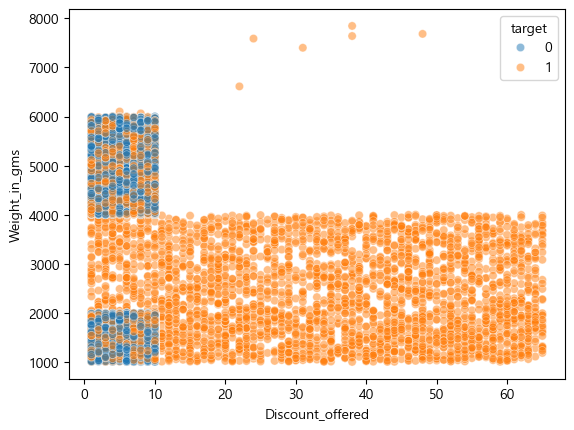

In [24]:
sns.scatterplot(x='Discount_offered', y='Weight_in_gms', hue='target', data=df, alpha=0.5)
plt.show()

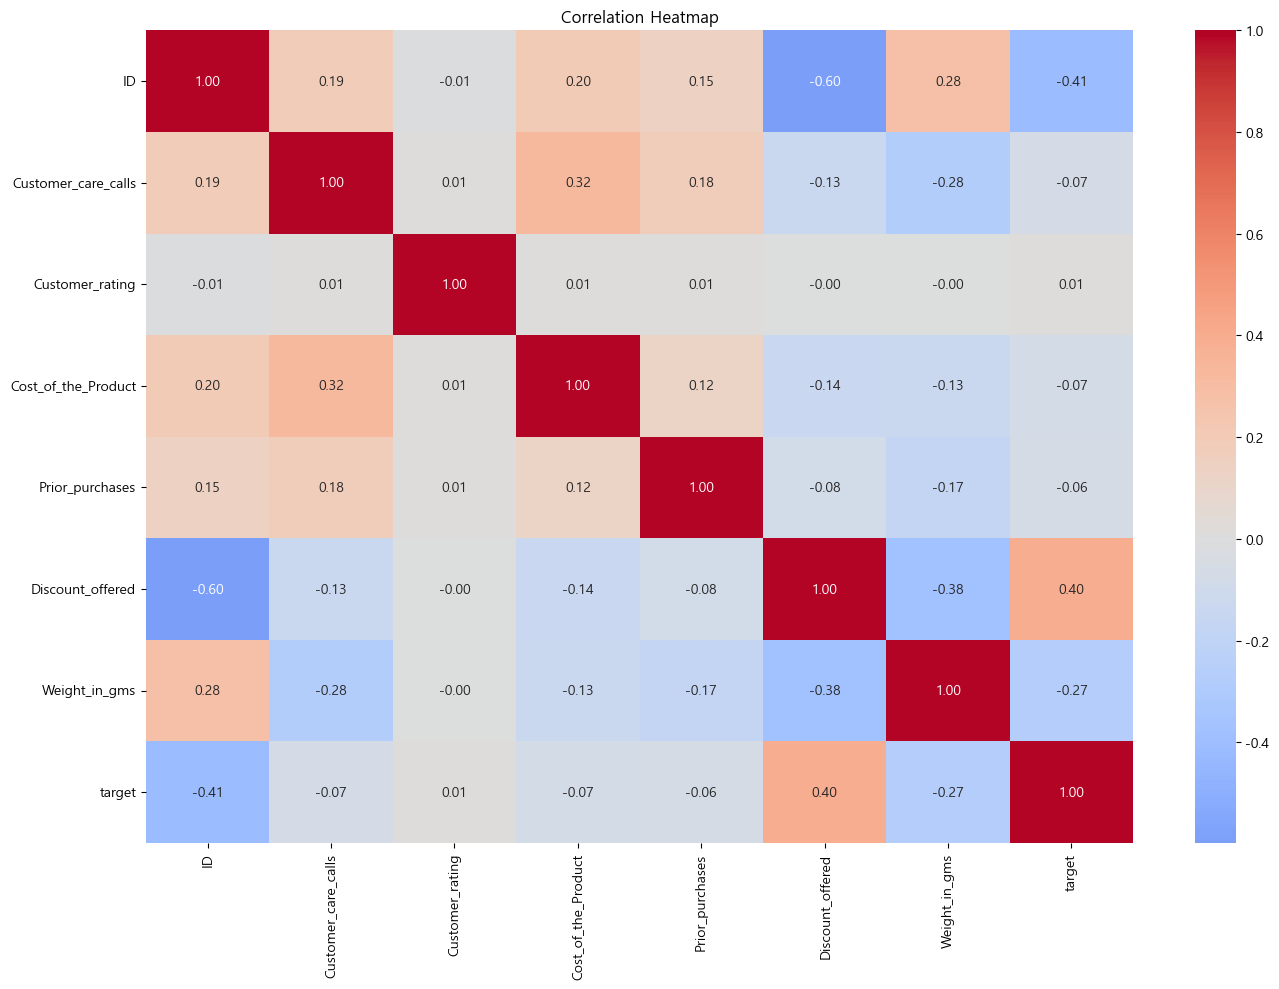

In [25]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop(columns=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']).corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### 2. 특성 엔지니어링

In [26]:
from sklearn.preprocessing import LabelEncoder

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  int64
 2   Mode_of_Shipment     10999 non-null  int64
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  int64
 8   Gender               10999 non-null  int64
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
 11  target               10999 non-null  int64
dtypes: int64(12)
memory usage: 1.0 MB


In [27]:
# df에 target값은 y_total 나머지는 x_total에 넣는디
x_total = df.drop(['target','ID'], axis=1)
y_total = df['target']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_total,y_total,test_size=0.2,random_state=42)

In [28]:
# sklearn의 선형회귀 모델 사용
from sklearn.ensemble import RandomForestClassifier

# 선형 회귀 대신 분류기 사용
model = RandomForestClassifier()

# 2. 모델 학습
model.fit(x_train, y_train)

# 3. 모델 예측
y_pred = model.predict(x_test)

# 4. 모델 평가
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.72      0.64       895
           1       0.77      0.64      0.70      1305

    accuracy                           0.68      2200
   macro avg       0.68      0.68      0.67      2200
weighted avg       0.69      0.68      0.68      2200



In [29]:
# 최종 금액
df['Final_Cost'] = df['Cost_of_the_Product']*(100-df['Discount_offered'])/100
# 가격 대비 무게 (단위 가격당 무게 밀도)
df['Weight_per_Cost'] = df['Weight_in_gms'] / df['Cost_of_the_Product']
# 할인
df['Discount_Bin'] = pd.cut(df['Discount_offered'], bins=[0, 10,100], labels=['10%', '10%~80%'])
# 무게의 구분
df['Weight_Bin'] = pd.cut(df['Weight_in_gms'], bins=[0, 2000,4000,8000], labels=['Low', 'Medium', 'High'])

In [30]:
# 1. 구매 당 할인액 (단골 고객 혜택 지표)
# 이전 구매 횟수가 많은 고객에게 할인이 얼마나 집중되었는지 확인
df['Discount_per_Purchase'] = df['Discount_offered'] / (df['Prior_purchases'] + 1)

# 2. 문의 당 무게 (배송 관리 부하 지표)
# 무거운 물건일수록 문의 전화가 많았는지, 아니면 무거운데도 문의가 적었는지 측정
df['Weight_per_Call'] = df['Weight_in_gms'] / (df['Customer_care_calls'] + 1)

# 3. 무게당 할인액 (무게 대비 가성비 지표)
# 가벼운 물건에 할인이 몰렸는지, 무거운 물건에 할인이 몰렸는지 확인 (배송 우선순위와 관련)
df['Discount_per_Gram'] = df['Discount_offered'] / df['Weight_in_gms']

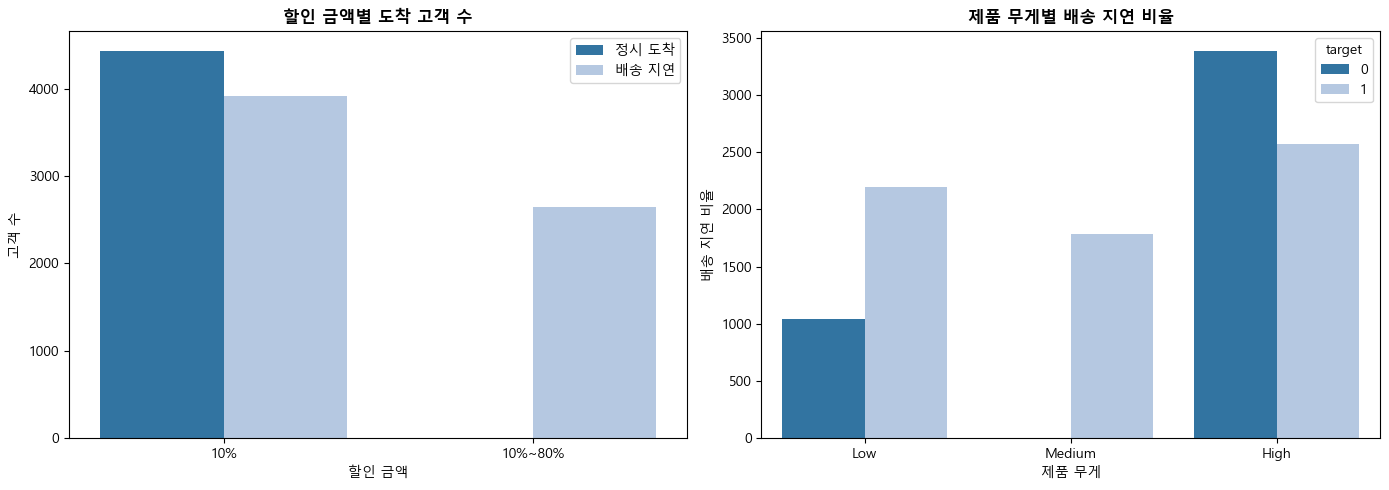

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Discount_Bin', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('할인 금액별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['10%', '10%~80%'])
axes[0].set_xlabel('할인 금액')
axes[0].set_ylabel('고객 수')

sns.countplot(x='Weight_Bin', hue='target', data=df, palette='tab20', ax=axes[1])
axes[1].set_title('제품 무게별 배송 지연 비율', fontweight='bold')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['Low', 'Medium', 'High'])
axes[1].set_xlabel('제품 무게')
axes[1].set_ylabel('배송 지연 비율')

plt.tight_layout()
plt.show()

Text(0, 0.5, '고객 수')

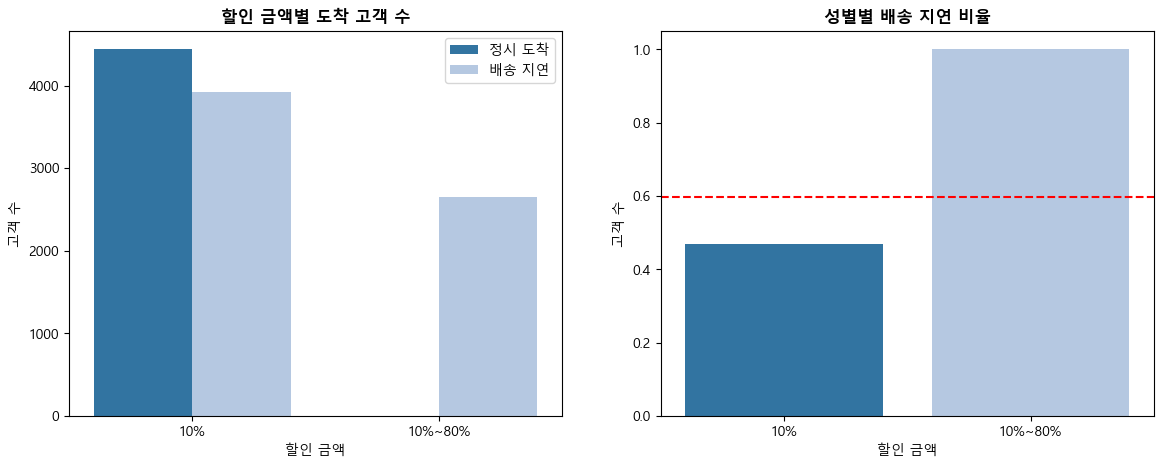

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Discount_Bin', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('할인 금액별 도착 고객 수', fontweight='bold')
axes[0].legend(['정시 도착', '배송 지연'])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['10%', '10%~80%'])
axes[0].set_xlabel('할인 금액')
axes[0].set_ylabel('고객 수')

sns.barplot(x='Discount_Bin', y='target', data=df, palette='tab20', hue='Discount_Bin', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('성별별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['10%', '10%~80%'])
axes[1].set_xlabel('할인 금액')
axes[1].set_ylabel('고객 수')

Text(0, 0.5, '배송 지연 비율')

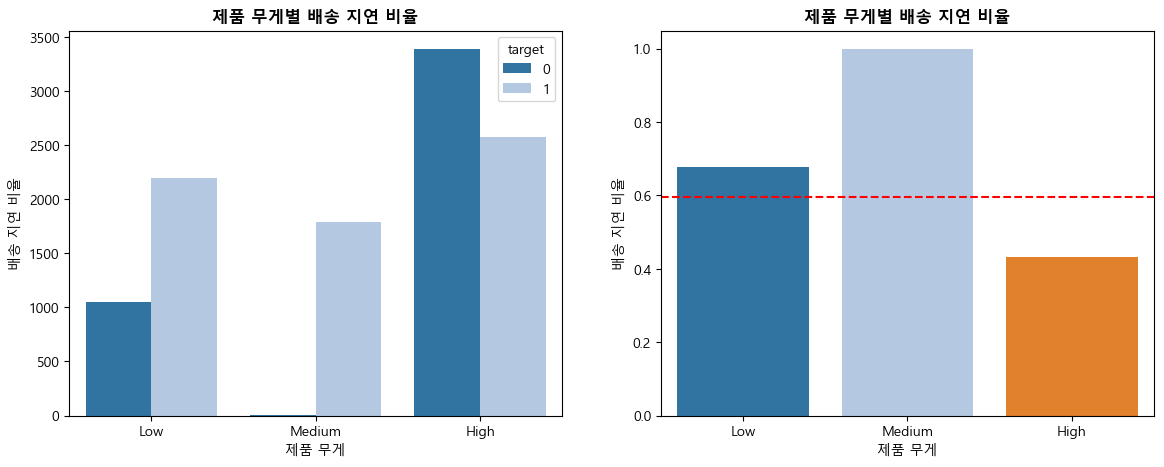

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Weight_Bin', hue='target', data=df, palette='tab20', ax=axes[0])
axes[0].set_title('제품 무게별 배송 지연 비율', fontweight='bold')
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['Low', 'Medium', 'High'])
axes[0].set_xlabel('제품 무게')
axes[0].set_ylabel('배송 지연 비율')

sns.barplot(x='Weight_Bin', y='target', data=df, palette='tab20', hue='Weight_Bin', legend=False, errorbar=None, ax=axes[1])
axes[1].set_title('제품 무게별 배송 지연 비율', fontweight='bold')
axes[1].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['Low', 'Medium', 'High'])
axes[1].set_xlabel('제품 무게')
axes[1].set_ylabel('배송 지연 비율')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     10999 non-null  int64   
 1   Warehouse_block        10999 non-null  int64   
 2   Mode_of_Shipment       10999 non-null  int64   
 3   Customer_care_calls    10999 non-null  int64   
 4   Customer_rating        10999 non-null  int64   
 5   Cost_of_the_Product    10999 non-null  int64   
 6   Prior_purchases        10999 non-null  int64   
 7   Product_importance     10999 non-null  int64   
 8   Gender                 10999 non-null  int64   
 9   Discount_offered       10999 non-null  int64   
 10  Weight_in_gms          10999 non-null  int64   
 11  target                 10999 non-null  int64   
 12  Final_Cost             10999 non-null  float64 
 13  Weight_per_Cost        10999 non-null  float64 
 14  Discount_Bin           10999 non-null 

* 라벨 인코딩(Label Encoding)

In [35]:
# sklearn의 선형회귀 모델 사용
from sklearn.ensemble import RandomForestClassifier

# 선형 회귀 대신 분류기 사용
model = RandomForestClassifier()

# 2. 모델 학습
model.fit(x_train, y_train)

# 3. 모델 예측
y_pred = model.predict(x_test)

# 4. 모델 평가
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.72      0.65       895
           1       0.77      0.64      0.70      1305

    accuracy                           0.68      2200
   macro avg       0.68      0.68      0.67      2200
weighted avg       0.69      0.68      0.68      2200



* 원-핫 인코딩(One-Hot Encoding)

In [36]:
df = pd.get_dummies(df, columns=['Discount_Bin','Weight_Bin'])


In [37]:
df = df.drop(['Cost_of_the_Product','Discount_offered','Weight_in_gms'], axis=1)

In [38]:
df = df.drop(['Gender','ID','Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating','Prior_purchases','Product_importance'], axis=1)

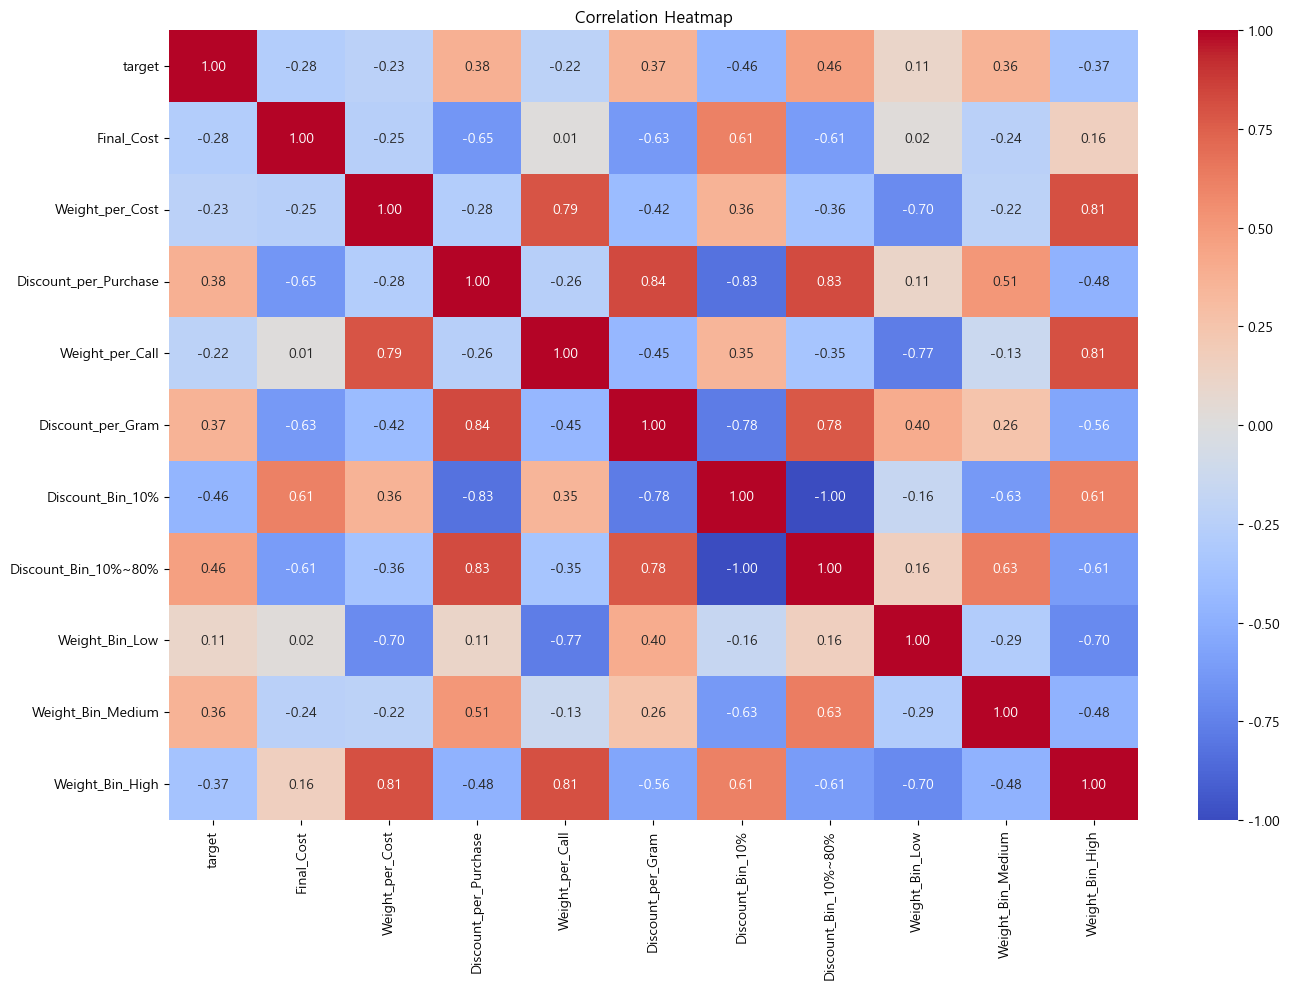

In [39]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [40]:
# df에 target값은 y_total 나머지는 x_total에 넣는디
x_total = df.drop(columns=['target'])
y_total = df['target']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_total,y_total,test_size=0.2,random_state=42)

In [41]:
# sklearn의 선형회귀 모델 사용
from sklearn.ensemble import RandomForestClassifier

# 선형 회귀 대신 분류기 사용
model = RandomForestClassifier()

# 2. 모델 학습
model.fit(x_train, y_train)

# 3. 모델 예측
y_pred = model.predict(x_test)

# 4. 모델 평가
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62       895
           1       0.75      0.67      0.70      1305

    accuracy                           0.67      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.67      0.67      2200



In [42]:
df.describe().round(4)

,target,Final_Cost,Weight_per_Cost,Discount_per_Purchase,Weight_per_Call,Discount_per_Gram
count,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000
mean,0.5967,183.1640,18.5173,3.3043,774.2859,0.0060
std,0.4906,56.9073,10.1089,4.3367,411.3648,0.0094
min,0.0000,36.6300,3.2355,0.0909,125.3750,0.0002
25%,0.0000,140.1500,9.6660,0.8000,366.3250,0.0009
50%,1.0000,186.2400,18.2098,1.6000,813.2000,0.0017
75%,1.0000,231.2800,25.1438,3.0000,1077.5000,0.0062
max,1.0000,306.9000,60.6735,21.6667,2615.3333,0.0595


* 표준화(Standardization)

In [43]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df['Final_Cost'] = standard_scaler.fit_transform(df['Final_Cost'].values.reshape(-1,1))


df['Weight_per_Cost'] = standard_scaler.fit_transform(df['Weight_per_Cost'].values.reshape(-1,1))
df['Weight_per_Call'] = standard_scaler.fit_transform(df['Weight_per_Call'].values.reshape(-1,1))


df.describe().round(4)

,target,Final_Cost,Weight_per_Cost,Discount_per_Purchase,Weight_per_Call,Discount_per_Gram
count,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000,10999.0000
mean,0.5967,-0.0000,0.0000,3.3043,0.0000,0.0060
std,0.4906,1.0000,1.0000,4.3367,1.0000,0.0094
min,0.0000,-2.5751,-1.5118,0.0909,-1.5775,0.0002
25%,0.0000,-0.7559,-0.8756,0.8000,-0.9918,0.0009
50%,1.0000,0.0541,-0.0304,1.6000,0.0946,0.0017
75%,1.0000,0.8456,0.6555,3.0000,0.7371,0.0062
max,1.0000,2.1744,4.1704,21.6667,4.4757,0.0595


In [44]:
# df에 target값은 y_total 나머지는 x_total에 넣는디
x_total = df.drop(columns=['target'])
y_total = df['target']

x_train,x_test,y_train,y_test = train_test_split(x_total,y_total,test_size=0.2,random_state=42)

In [45]:
# sklearn의 선형회귀 모델 사용
from sklearn.ensemble import RandomForestClassifier

# 선형 회귀 대신 분류기 사용
model = RandomForestClassifier()

# 2. 모델 학습
model.fit(x_train, y_train)

# 3. 모델 예측
y_pred = model.predict(x_test)

# 4. 모델 평가
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.68      0.63       895
           1       0.75      0.66      0.70      1305

    accuracy                           0.67      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.67      0.67      2200



머신러닝 모델러

In [46]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [47]:
# X_train과 y_train 합치기
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

In [48]:
import numpy as np
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

predictor_medium = TabularPredictor(
    label='target',                    # 타겟 변수
    problem_type='binary',           # 분류로 변경
    eval_metric='f1',  # 평가 지표 - 뭐뭐 있는지 확인
    path='AutoGluon_v1'              # 모델 저장 경로
)

# 모델 학습
predictor_medium.fit(
    train_data=train,
    tuning_data=test,             # 검증 데이터
    presets='medium_quality',            # 프리셋: 중간 품질
    time_limit=300,                      # 최대 5분
    verbosity=2,                          # 로그 상세도
    ag_args_fit={'model_random_seed': SEED} 
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          8
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       0.94 GB / 7.86 GB (12.0%)
Disk Space Avail:   110.09 GB / 237.43 GB (46.4%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'
Failed to save metadata file due to exception 'NoneType' object has no attribute 'lower', skipping...
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "c:\Users\User\github\DataScience\Ecom_Shipping\AutoGluon_v1"
Train Data Rows:    8799
Train Data Columns: 10
Tuning Data Rows:    2200
Tuning Data Columns: 10
Label Column:       target
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Featur

In [49]:
leaderboard = predictor_medium.leaderboard(test, silent=True)
print(leaderboard[['model','score_val','fit_time']])

                  model  score_val    fit_time
0   WeightedEnsemble_L2   0.747064   72.971941
1              LightGBM   0.745617    6.720275
2            LightGBMXT   0.744863   14.228364
3               XGBoost   0.744650   14.000428
4       NeuralNetFastAI   0.710563   50.812688
5      RandomForestEntr   0.709098   12.707950
6        ExtraTreesEntr   0.706606    2.651006
7      RandomForestGini   0.706219    7.593950
8        ExtraTreesGini   0.702925    3.040361
9        NeuralNetTorch   0.658440  170.524382
10             CatBoost   0.654437   10.990825


In [52]:
top5_models = leaderboard['model'].head(5).tolist()
print(top5_models)

for m in top5_models:
    print("\nMODEL:", m)
    print(predictor_medium.info()['model_info'][m]['hyperparameters'])

['WeightedEnsemble_L2', 'LightGBM', 'LightGBMXT', 'XGBoost', 'NeuralNetFastAI']

MODEL: WeightedEnsemble_L2
{'use_orig_features': False, 'valid_stacker': True, 'max_base_models': 0, 'max_base_models_per_type': 'auto', 'save_bag_folds': True, 'stratify': 'auto', 'bin': 'auto', 'n_bins': None, 'vary_seed_across_folds': False, 'model_random_seed': 0}

MODEL: LightGBM
{'learning_rate': 0.05, 'seed': 0}

MODEL: LightGBMXT
{'learning_rate': 0.05, 'extra_trees': True, 'seed': 0}

MODEL: XGBoost
{'n_estimators': 10000, 'learning_rate': 0.1, 'n_jobs': -1, 'proc.max_category_levels': 100, 'objective': 'binary:logistic', 'booster': 'gbtree', 'seed': 0}

MODEL: NeuralNetFastAI
{'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 'auto', 'lr': 0.01, 'epochs': 'auto', 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'smoothing': 0.0, 'random_seed': 0}


LightGBM Standard

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# {'learning_rate': 0.05, 'seed': 0}
lgbm = LGBMClassifier(random_state=0)
param_grid_lgbm = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 63],
    'n_estimators': [500, 1000]
}
clf_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=2, verbose=True, n_jobs=-1, scoring='f1')
best_lgbm = clf_lgbm.fit(x_train, y_train)

In [ ]:
# {'learning_rate': 0.05, 'extra_trees': True, 'seed': 0}
lgbm_xt = LGBMClassifier(extra_trees=True, random_state=0)
param_grid_xt = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_bin': [255, 511],
    'n_estimators': [500, 1000]
}
clf_xt = GridSearchCV(lgbm_xt, param_grid_xt, cv=2, verbose=True, n_jobs=-1, scoring='f1')
best_xt = clf_xt.fit(x_train, y_train)

2. XGBoost (범위 탐색)

In [ ]:
# {'n_estimators': 10000, 'learning_rate': 0.1, 'n_jobs': -1, 'proc.max_category_levels': 100, 'objective': 'binary:logistic', 'booster': 'gbtree', 'seed': 0}
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', booster='gbtree', random_state=0)
param_grid_xgb = {
    'n_estimators': [5000, 10000],
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8],
    'tree_method': ['hist'] # 메모리 효율을 위해 hist 권장
}

clf_xgb = GridSearchCV(xgb, param_grid_xgb, cv=2, verbose=True, n_jobs=-1, scoring='f1')
best_xgb = clf_xgb.fit(x_train, y_train)

# NeuralNetFastAI (MLP 모델로 근사화)

In [ ]:
# {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 'auto', 'lr': 0.01, 'epochs': 'auto', 'early.stopping.min_delta': 0.0001, 'early.stopping.patience': 20, 'random_seed': 0}
from sklearn.neural_network import MLPClassifier

nn_fastai = MLPClassifier(random_state=0, early_stopping=True, validation_fraction=0.1)
param_grid_nn = {
    'hidden_layer_sizes': [(200, 100), (512, 256)], # FastAI의 기본 레이어 구조 근사
    'learning_rate_init': [0.001, 0.01],
    'alpha': [0.1], # emb_drop/ps 대응 규제
    'max_iter': [200, 500]
}

clf_nn = GridSearchCV(nn_fastai, param_grid_nn, cv=2, verbose=True, n_jobs=-1, scoring='f1')
best_nn = clf_nn.fit(x_train, y_train)


In [60]:
# 'WeightedEnsemble_L2' -> 삭제 (자동 생성됨)
# 'LightGBM' -> 'GBM'
# 'LightGBMXT' -> 'GBM' (둘 다 같은 유형)
# 'XGBoost' -> 'XGB'
# 'NeuralNetFastAI' -> 'FASTAI'
# 'RandomForestEntr' -> 'RF' (추가)
top5_models = ['GBM', 'XGB', 'FASTAI','RF']

predictor_top5 = TabularPredictor(
    label='target',
    problem_type='binary',
    eval_metric='f1',
    path='AutoGluon_top5'
)

predictor_top5.fit(
    train_data=train,
    tuning_data=test,
    use_bag_holdout=True,
    included_model_types=top5_models,   
    presets='best_quality',             
    time_limit=600                      
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          8
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       0.60 GB / 7.86 GB (7.6%)
Disk Space Avail:   109.68 GB / 237.43 GB (46.2%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to False. Reason: Skip dynamic_stacking when use_bag_holdout is enabled. (use_bag_holdout=True)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Failed to save metadata file due to exception 'NoneType' object has no attribute 'lower', skipping...
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "c:\Users\User\github\DataScience\Ecom_Shipping\AutoGluon_top5"
Train Data Rows:    8799

In [ ]:
leaderboard = predictor_top5.leaderboard(test, silent=True)
print(leaderboard[['model','score_val','fit_time']])